<a href="https://colab.research.google.com/github/xu3cl4jo3/SocialNetwork_final_project/blob/main/Farmers_Protest_Tweet_Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network

node: 用戶 (為了簡化整個網路 edge>2 才繪出)
edge: 回覆貼文or引用貼文的有向邊

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive

#連結Google Drive
drive.mount('/content/drive')
# 讀取數據
user_df = pd.read_csv('/content/drive/MyDrive/SocialNetwork/archive/users.csv')
tweet_df = pd.read_csv('/content/drive/MyDrive/SocialNetwork/archive/tweets.csv')

# 通過 userId 把兩個DataSet合併
merged_df = pd.merge(tweet_df, user_df, how="inner", on="userId")

# 建立一個空的有向圖
G = nx.DiGraph()

# 添加節點（這裡假設每個用戶是一個節點）
for index, row in tqdm(user_df.iterrows(), total=user_df.shape[0], desc="Adding nodes"):
    G.add_node(row['username'])

# 添加邊（這裡假設每個回覆或引用是一個邊）
# 這裡假設我們有一個指向用戶的回覆或引用的數據，例如 `mentionedUsers`
for index, row in tqdm(merged_df.iterrows(), total=merged_df.shape[0], desc="Adding edges"):
    if pd.notnull(row['mentionedUsers']):
        # 應該解析 `mentionedUsers` 並添加所有相應的邊
        # 這裡只是一個範例，可能需要根據 `mentionedUsers` 的實際結構進行調整
        for mentioned_user in row['mentionedUsers'].split(';'):
            G.add_edge(row['username'], mentioned_user)


Mounted at /content/drive


Adding edges: 100%|██████████| 2524900/2524900 [02:41<00:00, 15621.27it/s]


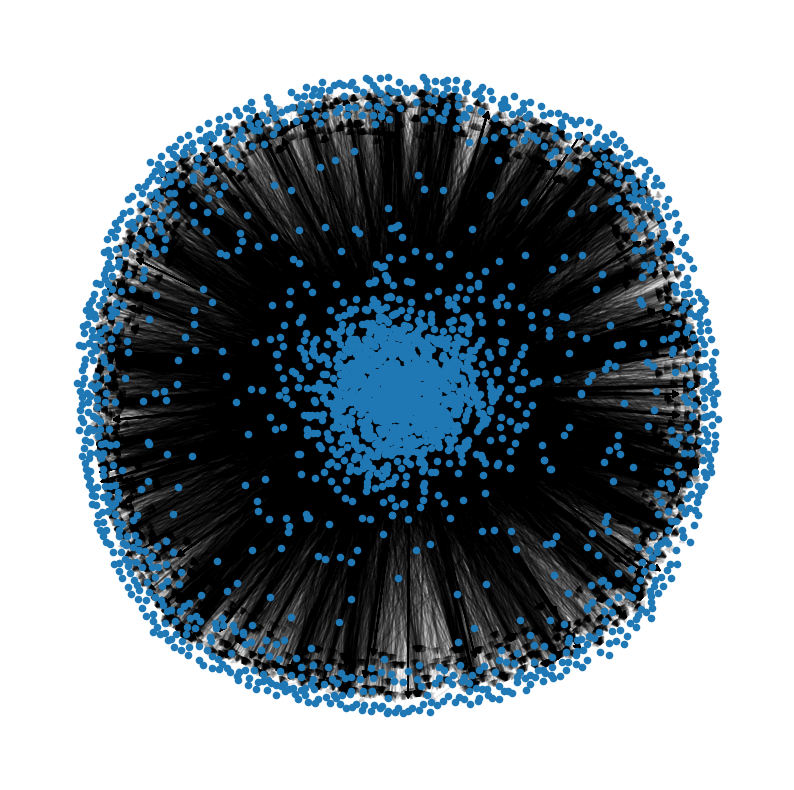

In [2]:
# 簡化網絡 大於15的才畫
degree = dict(G.degree())
to_keep = [n for n in degree if degree[n] > 15]
G2 = G.subgraph(to_keep)

# 使用 Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G2, seed=42)
plt.figure(figsize=(10, 10))

# 分別畫node,edge
nx.draw_networkx_nodes(G2, pos, node_size=20)
nx.draw_networkx_edges(G2, pos, alpha=0.1)

plt.axis("off")
plt.show()

# social community

用louvain算法

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


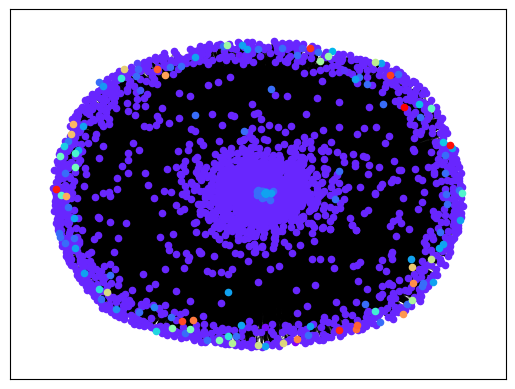

In [3]:
import community.community_louvain as cl
import matplotlib.cm as cm
import numpy as np

# 有向圖轉成無向圖
G2_un = G2.to_undirected()

# 使用Louvain方法
partition = cl.best_partition(G2_un)

# 每個community都對到一種顏色
colors = cm.rainbow(np.linspace(0, 1, max(partition.values())+1))

# 畫node
for community in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == community]
    nx.draw_networkx_nodes(G2_un, pos, list_nodes, node_size=20, node_color=colors[community])

nx.draw_networkx_edges(G2_un, pos, alpha=0.5)

plt.show()

# Degree Centrality

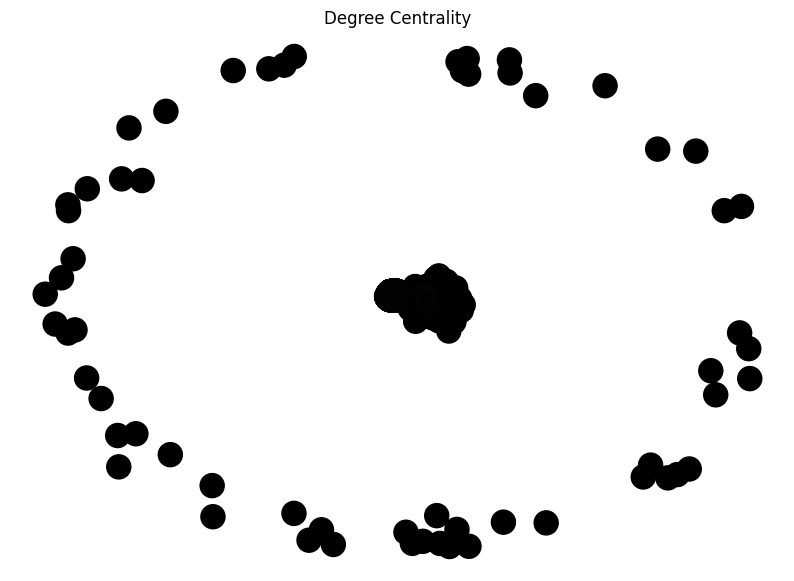

In [4]:
import matplotlib.pyplot as plt

# Degree Centrality
degree_centrality = nx.degree_centrality(G2_un)
max_dc = max(list(degree_centrality.values()))
degree_centrality_colors = [f"{i/max_dc:.6f}" for i in list(degree_centrality.values())]
plt.figure(figsize=(10, 7))
plt.title('Degree Centrality')
nx.draw(G2_un, node_color=degree_centrality_colors)
plt.show()

# Degree Centrality 圖表化

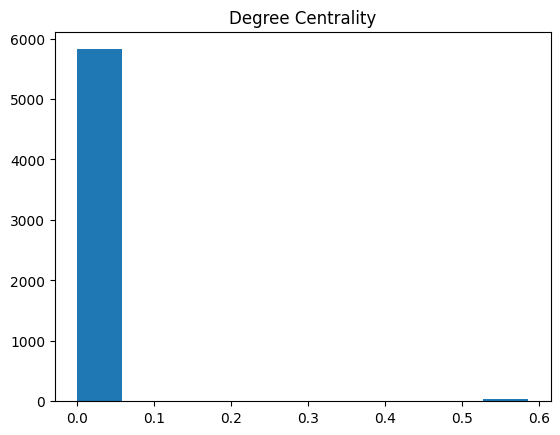

In [7]:
degree_centrality = nx.degree_centrality(G2_un)

plt.figure()
plt.hist(list(degree_centrality.values()))
plt.title('Degree Centrality')
plt.show()
#多數節點都極低，少數是>0.5(標準化後的值)

#Closeness Centrality


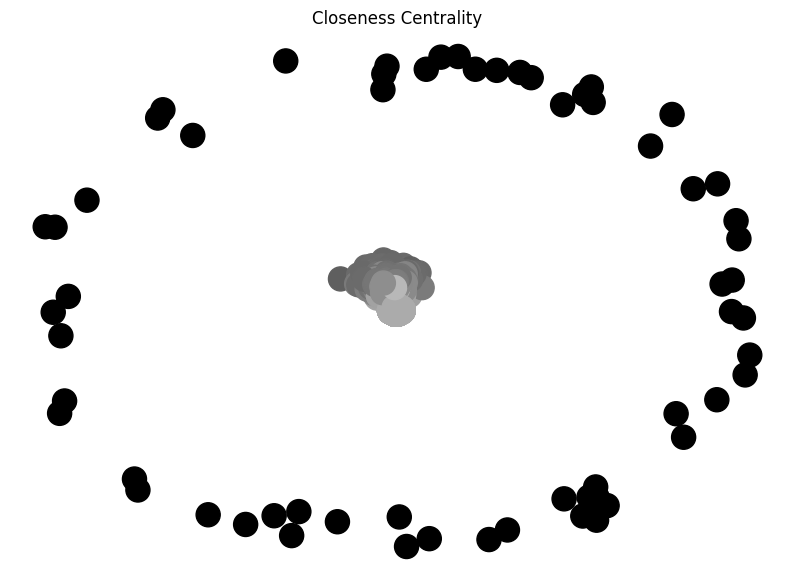

In [5]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G2_un)
max_cc = max(list(closeness_centrality.values()))
closeness_centrality_colors = [f"{i/max_cc:.6f}" for i in list(closeness_centrality.values())]
plt.figure(figsize=(10, 7))
plt.title('Closeness Centrality')
nx.draw(G2_un, node_color=closeness_centrality_colors)
plt.show()

#Closeness Centrality 圖表化

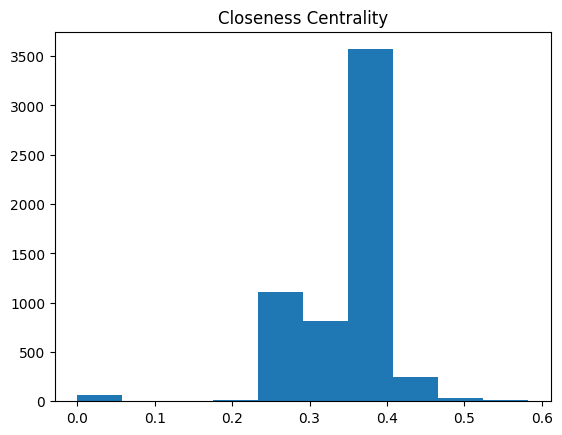

In [8]:
closeness_centrality = nx.closeness_centrality(G2_un)

plt.figure()
plt.hist(list(closeness_centrality.values()))
plt.title('Closeness Centrality')
plt.show()

#Betweenness Centrality



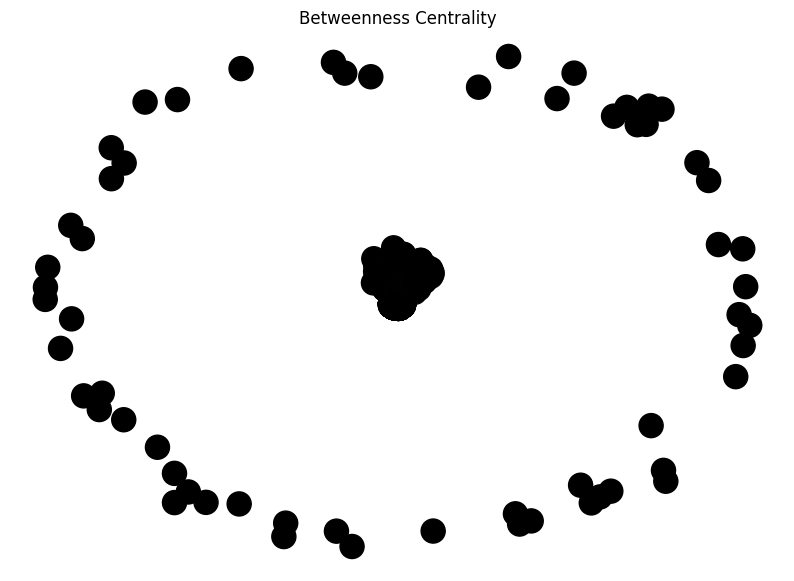

In [6]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G2_un)
max_bc = max(list(betweenness_centrality.values()))
betweenness_centrality_colors = [f"{i/max_bc:.6f}" for i in list(betweenness_centrality.values())]
plt.figure(figsize=(10, 7))
plt.title('Betweenness Centrality')
nx.draw(G2_un, node_color=betweenness_centrality_colors)
plt.show()

#Betweenness Centrality 圖表化

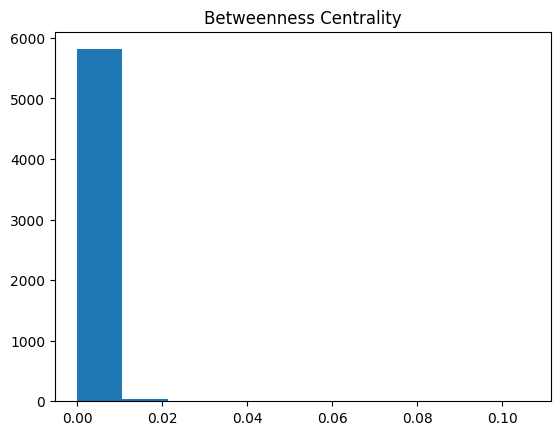

In [9]:
betweenness_centrality = nx.betweenness_centrality(G2_un)

plt.figure()
plt.hist(list(betweenness_centrality.values()))
plt.title('Betweenness Centrality')
plt.show()